In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import pickle

In [3]:
tf.random.set_seed(42)

In [4]:
SIZE = 256
BATCH_SIZE = 32

In [5]:
import os
dataset_root = '/kaggle/input/mydataset/images/natural/train'
dataset_root1 = '/kaggle/input/mydataset/images/natural/validation'

os.listdir(dataset_root1)

['Murraya Koenigii (Curry)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Punica Granatum (Pomegranate)',
 'Ficus Religiosa (Peepal Tree)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Psidium Guajava (Guava)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Moringa Oleifera (Drumstick)',
 'Brassica Juncea (Indian Mustard)',
 'Nerium Oleander (Oleander)',
 'Carissa Carandas (Karanda)',
 'Santalum Album (Sandalwood)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Mentha (Mint)',
 'Citrus Limon (Lemon)',
 'Alpinia Galanga (Rasna)',
 'Piper Betle (Betel)',
 'Basella Alba (Basale)',
 'Ficus(Tulsi)',
 'Pongamia Pinnata (Indian Beech)',
 'Mangifera Indica (Mango)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'Jasminum (Jasmine)',
 'Syzygium Jambos (Rose Apple)',
 'Ficus Auriculata (Roxburgh fig)',
 'Azadirachta Indica (Neem)',
 'Syzygium Cumini (Jamun)',
 'Hibiscus Rosa-sinensis']

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_root,
    validation_split=0.2,
    subset="training",  
    seed=1337,
    image_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
)
len(train_dataset)

Found 1836 files belonging to 30 classes.
Using 1469 files for training.


46

In [7]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_root1,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(SIZE, SIZE),
    batch_size=BATCH_SIZE,
)
len(val_dataset)

Found 2600 files belonging to 31 classes.
Using 520 files for validation.


17

In [8]:
class_names = train_dataset.class_names

In [9]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import tensorflow as tf

# Convert integer labels to one-hot encoding
def preprocess(images, labels):
    # Resize and normalize images
    images = tf.image.resize(images, (SIZE, SIZE))
    images = tf.keras.applications.xception.preprocess_input(images)
    return images, labels

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

xception_model = Xception(
    include_top=False,
    input_shape=(SIZE, SIZE, 3),
    pooling='avg' 
)

83683744/83683744 [==============================] - 0s 0us/step


In [11]:
train_dataset = train_dataset.map(preprocess)
val_dataset = val_dataset.map(preprocess)

In [12]:
activation = 'sigmoid'
feature_extractor = models.Sequential()
feature_extractor.add(xception_model)
feature_extractor.add(layers.Dense(128, activation=activation, kernel_initializer='he_uniform'))

In [13]:
prediction_layer = layers.Dense(len(class_names), activation='softmax')


In [14]:
cnn_model = models.Sequential([
    feature_extractor,
    prediction_layer
])

In [15]:
cnn_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
history = cnn_model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset
)

Epoch 1/10
46/46 [==============================] - 70s 763ms/step - loss: 1.4721 - accuracy: 0.6719 - val_loss: nan - val_accuracy: 0.0827
Epoch 2/10
46/46 [==============================] - 29s 619ms/step - loss: 0.3208 - accuracy: 0.9442 - val_loss: nan - val_accuracy: 0.2135
Epoch 3/10
46/46 [==============================] - 30s 642ms/step - loss: 0.1552 - accuracy: 0.9721 - val_loss: nan - val_accuracy: 0.2308
Epoch 4/10
46/46 [==============================] - 32s 672ms/step - loss: 0.0934 - accuracy: 0.9816 - val_loss: nan - val_accuracy: 0.1692
Epoch 5/10
46/46 [==============================] - 31s 664ms/step - loss: 0.1197 - accuracy: 0.9755 - val_loss: nan - val_accuracy: 0.1885
Epoch 6/10
46/46 [==============================] - 31s 658ms/step - loss: 0.0874 - accuracy: 0.9850 - val_loss: nan - val_accuracy: 0.1808
Epoch 7/10
46/46 [==============================] - 31s 665ms/step - loss: 0.1003 - accuracy: 0.9796 - val_loss: nan - val_accuracy: 0.2192
Epoch 8/10
46/46 [==

In [17]:
import pickle

# Save class names
with open('class_names.pkl', 'wb') as f:
    pickle.dump(class_names, f)


In [18]:
# Save Xception feature extractor
xception_model.save('xception_feature_extractor.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
import os
import cv2
import numpy as np
os.listdir('/kaggle/input/mydataset/images/natural/validation')

['Murraya Koenigii (Curry)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Punica Granatum (Pomegranate)',
 'Ficus Religiosa (Peepal Tree)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Psidium Guajava (Guava)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Moringa Oleifera (Drumstick)',
 'Brassica Juncea (Indian Mustard)',
 'Nerium Oleander (Oleander)',
 'Carissa Carandas (Karanda)',
 'Santalum Album (Sandalwood)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Mentha (Mint)',
 'Citrus Limon (Lemon)',
 'Alpinia Galanga (Rasna)',
 'Piper Betle (Betel)',
 'Basella Alba (Basale)',
 'Ficus(Tulsi)',
 'Pongamia Pinnata (Indian Beech)',
 'Mangifera Indica (Mango)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'Jasminum (Jasmine)',
 'Syzygium Jambos (Rose Apple)',
 'Ficus Auriculata (Roxburgh fig)',
 'Azadirachta Indica (Neem)',
 'Syzygium Cumini (Jamun)',
 'Hibiscus Rosa-sinensis']

In [20]:
import glob
train_images = []
train_labels = []
for directory_path in glob.glob("/kaggle/input/mydataset/images/natural/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

Murraya Koenigii (Curry)
Nyctanthes Arbor-tristis (Parijata)
Plectranthus Amboinicus (Mexican Mint)
Punica Granatum (Pomegranate)
Ficus Religiosa (Peepal Tree)
Muntingia Calabura (Jamaica Cherry-Gasagase)
Tabernaemontana Divaricata (Crape Jasmine)
Psidium Guajava (Guava)
Ocimum Tenuiflorum (Tulsi)
Moringa Oleifera (Drumstick)
Brassica Juncea (Indian Mustard)
Nerium Oleander (Oleander)
Carissa Carandas (Karanda)
Santalum Album (Sandalwood)
Artocarpus Heterophyllus (Jackfruit)
Mentha (Mint)
Citrus Limon (Lemon)
Alpinia Galanga (Rasna)
Piper Betle (Betel)
Basella Alba (Basale)
Pongamia Pinnata (Indian Beech)
Mangifera Indica (Mango)
Amaranthus Viridis (Arive-Dantu)
Trigonella Foenum-graecum (Fenugreek)
Jasminum (Jasmine)
Syzygium Jambos (Rose Apple)
Ficus Auriculata (Roxburgh fig)
Azadirachta Indica (Neem)
Syzygium Cumini (Jamun)
Hibiscus Rosa-sinensis


In [21]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("/kaggle/input/mydataset/images/natural/validation/*"):
    fruit_label = directory_path.split("/")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels) 

Murraya Koenigii (Curry)
Nyctanthes Arbor-tristis (Parijata)
Plectranthus Amboinicus (Mexican Mint)
Punica Granatum (Pomegranate)
Ficus Religiosa (Peepal Tree)
Muntingia Calabura (Jamaica Cherry-Gasagase)
Tabernaemontana Divaricata (Crape Jasmine)
Psidium Guajava (Guava)
Ocimum Tenuiflorum (Tulsi)
Moringa Oleifera (Drumstick)
Brassica Juncea (Indian Mustard)
Nerium Oleander (Oleander)
Carissa Carandas (Karanda)
Santalum Album (Sandalwood)
Artocarpus Heterophyllus (Jackfruit)
Mentha (Mint)
Citrus Limon (Lemon)
Alpinia Galanga (Rasna)
Piper Betle (Betel)
Basella Alba (Basale)
Ficus(Tulsi)
Pongamia Pinnata (Indian Beech)
Mangifera Indica (Mango)
Amaranthus Viridis (Arive-Dantu)
Trigonella Foenum-graecum (Fenugreek)
Jasminum (Jasmine)
Syzygium Jambos (Rose Apple)
Ficus Auriculata (Roxburgh fig)
Azadirachta Indica (Neem)
Syzygium Cumini (Jamun)
Hibiscus Rosa-sinensis


In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [47]:
import pickle

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)

In [23]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
x_train, x_test = x_train / 255.0, x_test / 255.0

In [39]:
X_for_RF = feature_extractor.predict(x_train) 

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

58/58 [==============================] - 9s 153ms/step


In [40]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [41]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

58/58 [==============================] - 9s 158ms/step


58/58 [==============================] - 9s 162ms/step


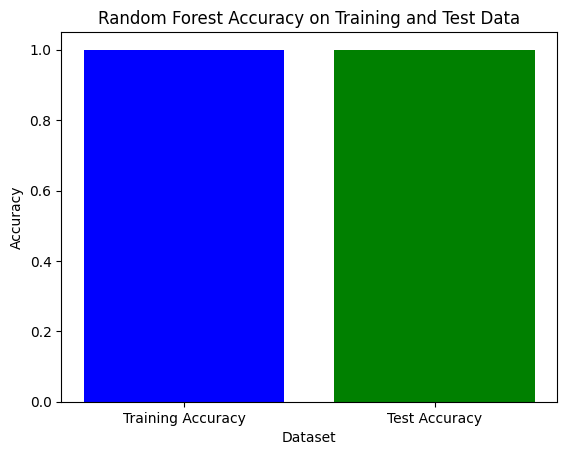

In [42]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

y_train_pred = RF_model.predict(X_for_RF)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the test set
X_test_feature = feature_extractor.predict(x_test)
y_test_pred = RF_model.predict(X_test_feature)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Create a bar chart to visualize the accuracies
accuracies = [train_accuracy, test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy on Training and Test Data')
plt.show()


Accuracy =  1.0


<Axes: >

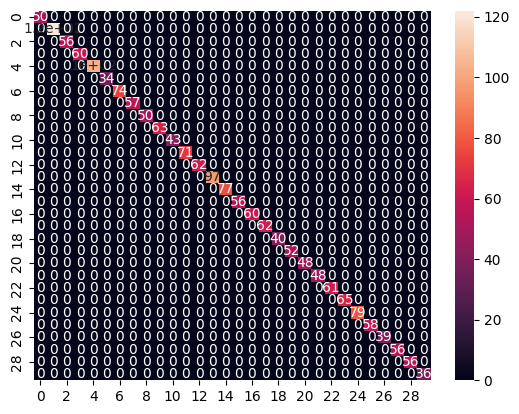

In [43]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF_pca)
sns.heatmap(cm, annot=True)

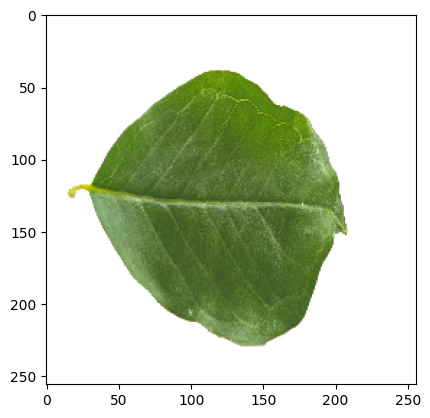

1/1 [==============================] - 0s 24ms/step
Predicted label for the image:  Punica Granatum (Pomegranate)


In [51]:
SIZE = 256
image_path = "/kaggle/input/helloworld/PG-S-002.jpg" 
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.resize(img, (SIZE, SIZE))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=0) / 255.0  

features = feature_extractor.predict(img)

    # Predict using the trained RandomForest model
prediction_RF = RF_model.predict(features)[0]
predicted_label = le.inverse_transform([prediction_RF])[0]

print("Predicted label for the image: ", predicted_label)


In [45]:
import pickle
import joblib

joblib.dump(RF_model, 'random_forest_model.joblib')
# with open('random_forest_model.pkl', 'wb') as model_file:
#     pickle.dump(RF_model, model_file, protocol=pickle.HIGHEST_PROTOCOL)


['random_forest_model.joblib']

In [ ]:
# import pickle

# # Save the Random Forest model
# with open('random_forest_model.pkl', 'wb') as model_file:
#     pickle.dump(RF_model, model_file, protocol=pickle.HIGHEST_PROTOCOL)
